# Image Colorization

In [2]:
# Project Outline

# 1 Imports
# 2 Data
# 3 Preprocessing 
# 4 Model 
# 5 Training
# 6 Evaluation
# 7 Visualization

In [3]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Data (perhaps should be gradually read in to help with memory)
l_path = "Data/Raw/gray_scale.npy"
ab_paths = ["Data/Raw/ab/ab1.npy", "Data/Raw/ab/ab2.npy", "Data/Raw/ab/ab3.npy"]

# Load grayscale and color arrays
l_data = np.load(l_path)
ab_list = [np.load(path) for path in ab_paths]
ab_data = np.concatenate(ab_list, axis=0)

In [5]:
# Lightness should be in the range of 0 to 100 for absolute black and absolute white respectively 
print(type(l_data))
print(l_data.shape)
print(l_data.max())
print(l_data.min())

# l_data_normalized = (l_data / 128) - 1



<class 'numpy.ndarray'>
(25000, 224, 224)
255
0


In [6]:
# AB (Green-Magenta and Blue-Yellow) should be in the range of -128 to 127
print(ab_data.shape)
print(ab_data.max())
print(ab_data.min())

# TLDR: Something is wonky about this data; best guess right now is that it used OpenCV's LAB format
# Might have to convert to normal LAB before normalizing to [-1, 1]

(25000, 224, 224, 2)
226
20


: 

In [7]:
# normalize
l_data = l_data.astype("float32") / 100.0 #100 for black and white
ab_data = ab_data.astype("float32") / 128.0 #128 for color


In [ ]:
#look who's using keras!!! can change test size
#takes about a minute rn
# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(l_data, ab_data, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
#function to visualize an image
def lab_to_rgb(L, ab):
    #undo normalization
    L = L * 100.0
    ab = ab * 128.0
    #merge channels to create LAB
    lab = np.concatenate([L, ab], axis=-1).astype("float32")

    #convert LAB to color (rgb)
    rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    rgb = np.clip(rgb, 0, 1)
    return rgb

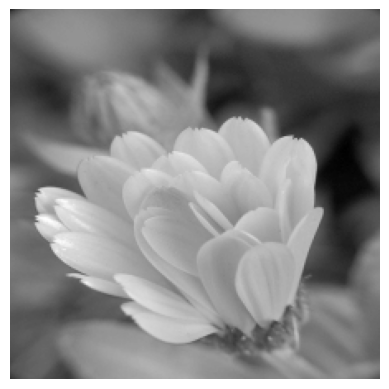

In [ ]:
#display sample grayscale image
L_sample_pic = X_train[354] #choose whatever pic you want using index
plt.imshow(L_sample_pic.squeeze(), cmap="gray")#create 2D array for plotting
plt.axis("off")
plt.show()

baseline_visualization(X_train, y_train, index=354)

In [ ]:
# Test: Predicted L + predicted ab --> LAB image --> Convert to RGB --> Display color image!!!
# L channel = grayscale
# A channel = positive a --> magenta, negative a --> green
# B channel = positive b --> yellow, negative b --> blue
# Then, [L, a, b] --> full color image
def baseline_visualizataion(l_data, ab_data, index=None):
    if index is None:
        index = np.random.randint(0, l_data.shape[0])

    L = l_data[index]
    ab = ab_data[index]

    # convert back to RGB
    rgb = lab_to_rgb(L, ab)

    plt.figure(figsize=(10,4))
    
    # Show the grayscale L channel
    plt.subplot(1, 3, 1)
    plt.imshow(L.squeeze(), cmap="gray")
    plt.title("L (Grayscale)")
    plt.axis("off")

    # Show the reconstructed RGB image
    plt.subplot(1, 3, 2)
    plt.imshow(rgb)
    plt.title("Reconstructed RGB")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

    print(f"Displayed sample index: {index}")
